In [1]:
import sys
sys.path.append("C:\\Users\\Pandora\\Documents\\GitHub\\JenTrace\\src")

In [2]:
from JenTrace.opt_sys import OpSysData

#Create an object to store the lens data.
syst1 = OpSysData()  


SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    10.000000     0.000000            1     standard 
    1     0.000000     0.000000            1     standard 


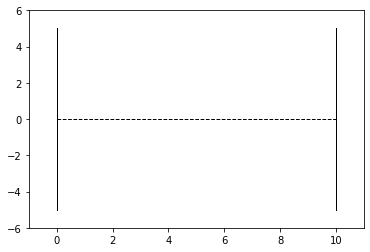

In [3]:
syst1.print_report()
syst1.plot_optical_system(clearSemDia_usr=[5])

In [4]:
# Add the lens information 
# link https://www.edmundoptics.de/p/125mm-dia-x-25mm-fl-mgfsub2sub-coated-achromatic-doublet-lens/2280/
syst1.add_surface(5.00 ,1/17.27   ,'N-BAF10')
syst1.add_surface(1.25 ,1/-10.99  ,'N-SF10')
syst1.add_surface(3    ,1/-107.03 ,1)


SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    10.000000     0.000000            1     standard 
    1     5.000000     0.057904      N-BAF10     standard 
    2     1.250000    -0.090992       N-SF10     standard 
    3     3.000000    -0.009343            1     standard 
    4     0.000000     0.000000            1     standard 


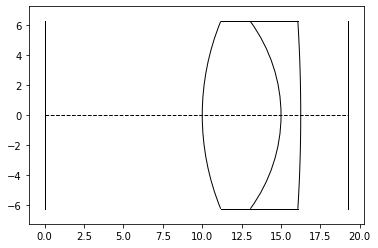

In [5]:
syst1.print_report()
syst1.plot_optical_system(clearSemDia_usr=[12.5/2])

In [6]:
#Add second
#Link https://www.edmundoptics.de/p/15mm-dia-x-45mm-fl-uncoated-double-convex-lens/18182/
#To change the las surface distance from the previus value 3mm to 1.0mm
syst1.change_surface(1.0    ,1/-107.03 ,1 ,surfIndex=3)

#Add the second lens
syst1.add_surface(3.00 ,1/ 45.99    ,'N-BK7')
syst1.add_surface(1.5  ,1/-45.99    ,1    )



SURFACE LIST
Class:OpSysData
    #     Distance    Curvature     Material         Type 
    0    10.000000     0.000000            1     standard 
    1     5.000000     0.057904      N-BAF10     standard 
    2     1.250000    -0.090992       N-SF10     standard 
    3     1.000000    -0.009343            1     standard 
    4     3.000000     0.021744        N-BK7     standard 
    5     1.500000    -0.021744            1     standard 
    6     0.000000     0.000000            1     standard 


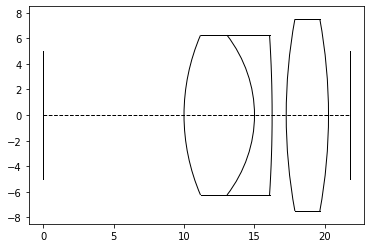

In [7]:
syst1.print_report()
syst1.plot_optical_system(clearSemDia_usr=[5, 12.5/2, 12.5/2, 12.5/2, 15/2, 15/2, 5])

In [8]:
from JenTrace.ray_src import RaySource
#Create a ray source to store data
pto1=RaySource()
#Add a ray to the ray source
pto1.new_ray([0,2,0],[0,0,1],587.6 )  

In [9]:
pto1.print_report()


RAY LIST
Class:RaySource
    #         XPos         YPos         ZPos      XCosDir      YCosDir      ZCosDir   Wavelength 
    0     0.000000     2.000000     0.000000     0.000000     0.000000     1.000000   587.600000 


In [10]:
from JenTrace.ray_trc import trace, print_report
from JenTrace.plt_fnc import plot_system, plot_rayTrace
import matplotlib.pyplot as plt

#Trace the ray through the optical system
trace1 = trace(pto1.RayList,syst1.SurfaceData)
print_report(trace1, 'ray',index=0)


RAYTRACE REPORT - RAY #0

  Prop\Surf#       Object            1            2            3            4            5        Image 
           d    10.000000     5.000000     1.250000     1.000000     3.000000     1.500000     0.000000 
           c     0.000000     0.057904    -0.090992    -0.009343     0.021744    -0.021744     0.000000 
           n     1.000000     1.670027     1.728272     1.000000     1.516798     1.000000     1.000000 
          X0     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
          Y0     0.000000     2.000000     1.771919     1.723535     1.642670     1.447022     1.272402 
           F     0.000000     0.231616    -0.285687    -0.027755     0.058673    -0.045529     0.000000 
           G     0.000000     1.000000     0.991390     0.998583     0.999650     0.995847     0.993380 
       Delta     0.000000     0.116199    -0.145049    -0.013898     0.029356    -0.022865     0.000000 
           X     0.000000   

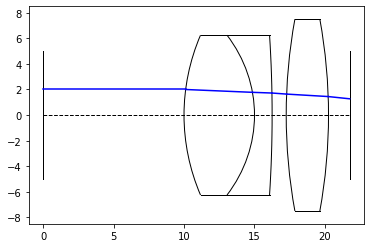

In [11]:
fig, ax = plt.subplots()
fig, ax = plot_system(syst1,fig=fig,ax=ax,clearSemDia=[5, 12.5/2, 12.5/2, 12.5/2, 15/2, 15/2,  5])
fig, ax = plot_rayTrace(trace1,fig=fig,ax=ax,color='b')    